### 기타 그래프 이론

### 서로소 집합
* 서로소 집합(Disjoint Sets)이란 공통 원소가 없는 두 집합을 의미

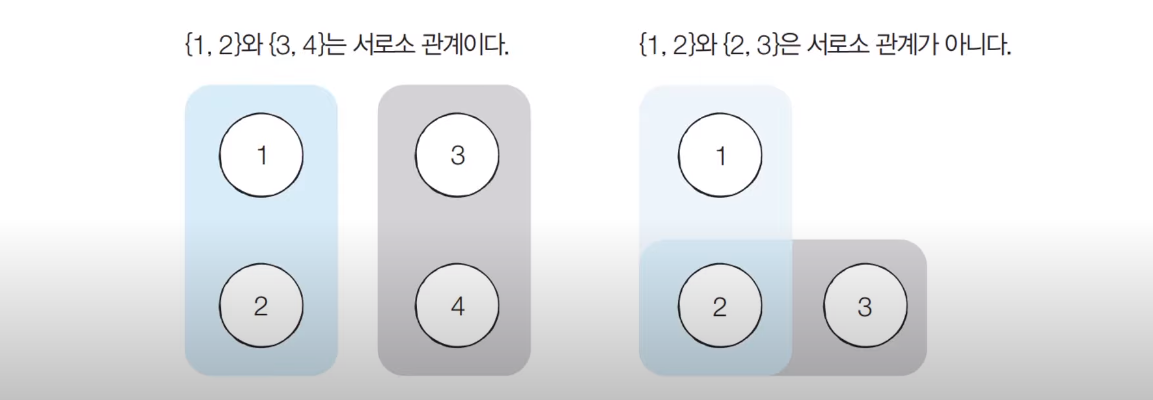

#### 서로소 집합 자료구조

* 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조
* 서로소 집합 자료구조는 두 종류의 연산을 지원 
    - **합집합(Union)** : 두 개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
    - **찾기(Find)** : 특정한 원소가 속한 집합이 어떤 집합인지 알려주는 연산
* 서로소 집합 자료구조는 **합치기 찾기(Union Find) 자료구조** 라고 불리기도 한다. 

* 여러 개의 합치지 연산이 주어졌을 때 서로소 집합 자료구조의 동작 과정
    1. 합집합(Union) 연산을 확인하여, 서로 연결된 두 노드 A, B를 확인한다.
        1) A와 B의 루트 노드 A', B'를 각각 찾는다.
        2) A'를 B'의 부모 노드로 설정
    2. 모든 합집합(Union) 연산을 처리할 때까지 1번의 과정을 반복

**서로소 집합 자료구조 : 연결성**
* 기본적인 형태의 서로소 집합 자료구조에서는 루트 노드에 즉시 접근할 수 없다.
    - 루트 노드를 찾기 위해 부모 테이블을 계속해서 확인하며 거슬러 올라가야 한다.

**서로소 집합 자료구조 : 기본적인 구현 방법(Python)**

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x) :
    # 루트 노드를 찾을 때까지 재귀 호출 
    if parent[x] != x:
        return find_parent(parent, parent[x]) 
    return x 

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b) :
    a = find_parent(parent, a)
    b = find_parent(parnet, b)
    if a < b :
        parent[b] = a
    else : 
        parent[a] = b

# 노드의 개수와 간선(Uinon 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화 

# 부모 테이블상에서, 부모를 자기 자신으로 초기화 
for i in range(1, v + 1) :
    parent[i] = i 
    
# Uinon 연산을 각각 수행 
for i in range(e) :
    a, b = map(int, input().split())
    union_parent(parent, a, b)
    
# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합 : ', end = '')
for i in range(1, v + 1):
    print(find_parent(parent, i), end = ' ' )
    
print()

# 부모 테이블 내용 출력하기
print('부모 테이블 : ', end = '')
for i in range(1, v + 1) :
    print(parent[i], end = ' ')

**서로소 집합 자료구조 : 기본적인 구현 방법의 문제점**
* 합집합(Union) 연산이 편향되게 이루어지는 경우 찾기(Find) 함수가 비효율적으로 동작


**서로소 지밥 자료구조 : 경로 압축**
* 찾기(Find) 함수를 최적화하기 위한 방법으로 경로 압축(Path Compression)을 이용할 수 있다.
    - 찾기(Find) 함수를 재귀적으로 호출한 뒤에 부모 테이블 값을 바로 갱신함

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x) :
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x :
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

**서로소 집합 자료구조 : 경로 압축**
* 경로 압축 기법을 적용하면 각 노드에 대하여 찾기(Find) 함수를 호출한 이후에 해당 노드의 루트 노드가 바로 부모 노드가 됩니다.
* 동일한 예시에 대해서 **모든 합집합(Union) 함수를 처리한 후 각 원소에 대하여 찾기(Find) 함수를 수행하면 다음과 같이 부모 테이블이 갱신** 됩니다.
* 기본적인 방법에 비하여 시간 복잡도가 개선됩니다.

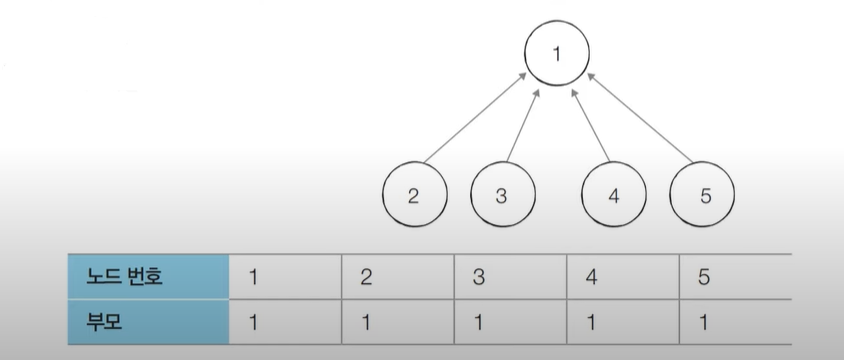

**서로소 집합 자료구조 : 경로 압축(Python)**

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x) :
    # 루트 노드를 찾을 때까지 재귀 호출 
    if parent[x] != x :
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b) :
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b :
        parent[b] = a
        parent[a] = b
        
# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화 
for i in range(1, v + 1) :
    parent[i] = i 
    
# Union 연산을 각각 수행 
for i in range(e) :
    a, b = map(int, input().split())
    union_parent(parent, a, b)
    
# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합 : ', end = '')
for i in range(1, v + 1):
    print(find_parent(parent, i), end = ' ')
    
print()

# 부모 테이블 내용 출력하기
print('부모 테이블: ', end = '')
for i in range(1, v + 1) :
    print(parent[i], end = ' ')


**서로소 집합을 활용한 사이클 판별**
* 서로소 집합은 **무방향 그래프 내에서 사이클을 판별**할 때 사용할 수 있음
    - 참고로 방향 그래프에서의 사이클 여부는 DFS를 이용하여 판별할 수 있음
* **사이클 판별 알고리즘**
    1. 각 간선을 하나씩 확인하며 두 노드의 루트 노드를 확인
        1) 루트 노드가 서로 다르다면 두 노드에 대하여 합집합(Union) 연산을 수행함
        2) 루트 노드가 서로 같다면 사이클(Cycle)이 발생한 것
    2. 그래프에 포함되어 있는 모든 간선에 대하여 1번 과정을 반복

**서로소 집합을 활용한 사이클 판별**

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x) :
    # 루트 노드를 찾을 때까지 재귀 호출 
    if parent[x] != x :
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b) :
    a = find_parent(parent, a) 
    b = find_parent(parent, b) 
    if a < b :
        parent[b] = a
    else  :
        parent[a] = b
        
# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화 
for i in range(1, v + 1):
    parent[i] = i 

cycle = False # 사이클 발생 여부 

for i in range(e) :
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료 
    if find_parent(parent, a) == find_parent(parent, b) :
        cycle = True
        break
    # 사이클이 발생하지 않았다면 합집합(Union) 연산 수행
    else : 
        union_parent(parent, a, b)
        
        
if cycle : 
    print("사이클이 발생했습니다.")
else : 
    print("사이클이 발생하지 않았습니다.")
    

**신장 트리**
* 그래프에서 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프를 의미
    - 모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건은 트리의 조건이기도 한다.

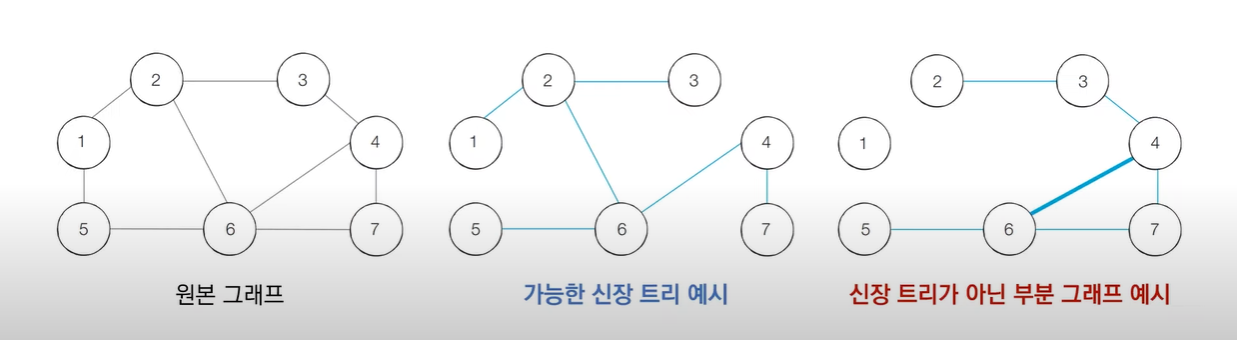

### 크루스칼 알고리즘

* 대표적인 **최소 신장 트리 알고리즘**
* 그리디 알고리즘으로 분류
* 구체적인 동작 과정
    1. 간선 데이터를 비용에 따라 **오름차순으로 정렬**
    2. 간선을 하나씩 확인하며 현재의 간선이 사이클을 발생시키는지 확인
        1) 사이클이 발생하지 않는 경우 최소 신장 트리에 포함
        2) 사이클이 발생하는 경우 최소 신장 트리에 포함시키지 않음
        
    3. 모든 간선에 대하여 2번의 과정을 반복

**크루스칼 알고리즘**

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x) :
    # 루트 노드를 찾을 때까지 재귀 호출 
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b) :
    a = union_parent(parent, a)
    b = union_parent(parent, b)
    if a < b :
        parent[b] = a
    else  :
        parent[a] = b
        
# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수 
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화 
for i in range(1, v + 1):
    parent[i] = i 
    
# 모든 간선에 대한 정보를 입력 받기 
for _ in range(e) :
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))
    
# 간선을 비용순으로 정렬 
edges.sort()


# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함 
    if find_parent(parent, a) != find_parent(parent, b) :
        union_parent(parent, a, b)
        result += cost
        
print(result)



### 위상 정렬

* 사이클이 없는 방향 그래프의 모든 노드를 **방향성에 거스르지 않도록 순서대로 나열** 하는 것을 의미
* 의미 ) 선수과목을 고려한 학습 순서 설정 

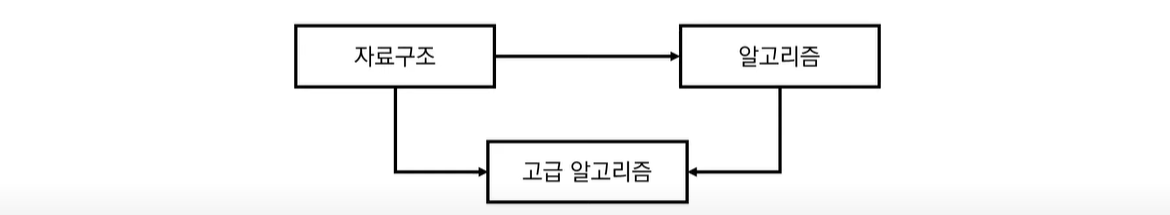

* 위 세 과목을 모두 듣기 위한 **적절한 학습 순서는?**
    - 자료구조 → 알괼즘 → 고급 알고리즘 (O)
    - 자료구조 → 고급 알고리즘 → 알고리즘 (X)

**진입차수와 진출차수**
* **진입차수(Indegree)** : 특정한 노드로 들어오는 간선의 개수 
* **진출차수(Outdegree)** : 특정한 노드에서 나가는 간선의 개수 

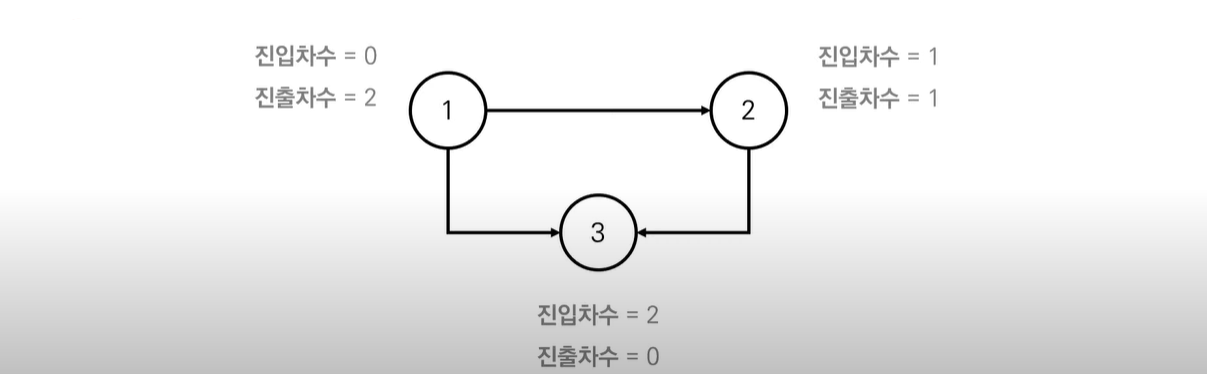

**위상 정렬 알고리즘**
* **큐**를 이용하는 **위상 정렬 알고리즘의 동작 과정** 은 다음과 같다.
1. 진입차수가 0인 모든 노드를 큐에 넣는다.
2. 큐가 빌 때까지 다음의 과정을 반복 
    1) 큐에서 원소를 꺼내 해당 노드에서 나가는 간선을 그래프에서 제거
    2) 새롭게 진입차수가 0이 된 노드를 큐에 넣는다.

▶ 결과적으로 **각 노드가 큐에 들어온 순서가 위상 정렬을 수행한 결과**와 같다.

**위상 정렬 동작 예시**
* 위상 정렬을 수행할 그래프를 준비
    - 이때 그래프는 **사이클이 없는 방향 그래프(DAG)** 여야 합니다.

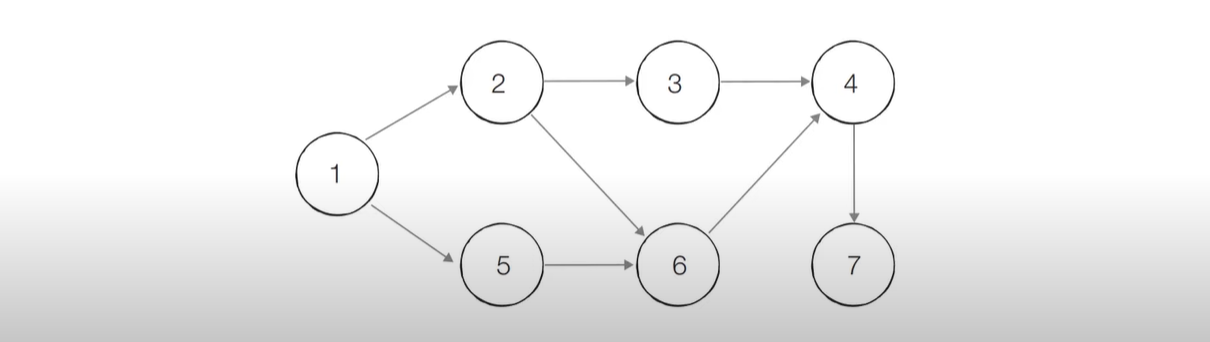

**위상 정렬의 특정**
* 위상 정렬은 DAG에 대해서만 수행할 수 있다.
    - **DAG(Direct Acyclic Graph)** : 순한하지 않는 방향 그래프
* 위상 정렬에서는 **여러 가지 답이 존재**할 수 있다.
    - 한 단계에서 큐에 새롭게 들어가는 원소가 2개 이상인 경우가 있다면 여러 가지 답이 존재함
* **모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재** 한다고 판단할 수 있음
    - 사이클에 포함된 원소 중에서 어떠한 원소도 큐에 들어가지 못한다.
* 스택을 활용한 DFS를 이용해 위상 정렬을 수행할 수도 있다.